# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**The following is a summary of the Business Context and Objective for this project:**

**Business Context:**

E-news portals offer an opportunity to easily and quickly get updates on the day-to-day events occuring worldwide.
The advantage is we can utilize multimedia technologies that traditional newspapers don't offer along with other interactive elements. The data is retrieved electronically from online databases, processed using various softwares and then transmitted to the users.

The client -**E-news Express**- aims to expand its business by acquiring new subscribers.The company plans to analyze user website behavior to understand user interestests and to understand how to drive better engagement.
However, the executives at E-news Expressthinks there is a decline in new monthly subscribers compared to last year due to the current website landing page not being designed well enough to keep customers engaged and interested enough to subscribe.


**Objective**

The company decided to do some A/B Testing between the existing and a newly designed landing page. They took 100 random users and divided them equally intwo 2 groups The first control group got the existing landing page and the remaining users were the treatment group and were assigned to the new landing page. Assuming we are data scientists at E-news Express, we are asked to explore the data and perform a statistical analysis (with a significance level at 5%) to determine the effenctivess of the new landing page in gathering new subscribers for the news portal.

We're going to do some data and statistical analysis on the resulting data and answer the following 4 questions:

 1. Do the users spend more time on the new landing page than on the existing landing page?
 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
 3. Does the converted status depend on the preferred language
 4. Is the time spent on the new page the same for the different language users?















## Import all the necessary libraries

In [336]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [337]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/abtest.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [338]:
#Viewing the first rows of the dataset
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [339]:
#Viewing the last rows of the data set
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [340]:
#Shape of the dataset
df.shape

(100, 6)

    Observations:
      * There are 100 records and 6 columns in this dataframe.

In [341]:
#Getting the statistical summary of the summary
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


    Observations:
      * Since we have a lot of discrete data with binary or few options, a lot of columns will have NaN for a calculated numerical statistic.
      * This doesn't mean we are necessarily missing data though.  

In [342]:
#Also decided to look at the info of the data to see what types of data are in the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


    Observations:
      * Most of our columns are in objects and we can assume some of the data here will be discrete based on the column name.
      * The only variable that is continuous is 'time spent on the page'.

In [343]:
#Checking for Missing Values
data_new=pd.read_csv('/content/drive/MyDrive/abtest.csv', na_values=['Not given','inf'])
data_new.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

    Observations:
      * It seems we have no missing data in the data set provided, that's great! Saves us some time.

In [344]:
#Check for Duplicates
duplicates = df.duplicated()

# Display duplicate rows
duplicate_rows = df[duplicates]
print("Duplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


    Observations:
      * It seems we have no duplicate records given that the function returned an empty dataframe.

### Univariate Analysis

The following 6 sections are the univariate analysis and the observations for such.

##### 1) User ID

In [345]:
df['user_id'].nunique()

100

    Observations:
      *  There are 100 distinct users in this data set.
      



#####2) Group

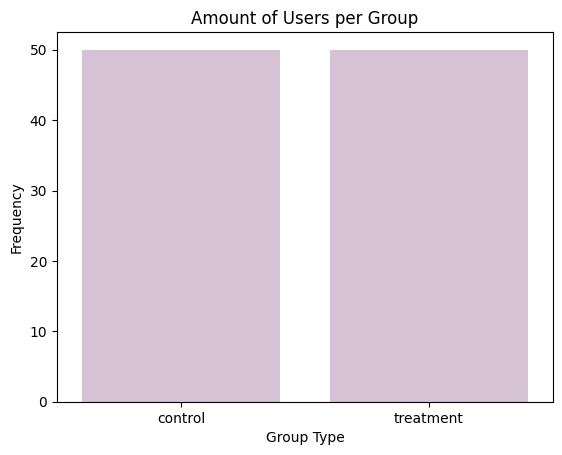



Stats for the Group column
--------------------------------------------------


count         100
unique          2
top       control
freq           50
Name: group, dtype: object

In [346]:
#Plot the data in the Group column
plt.title("Amount of Users per Group")
plt.xlabel('Group Type')
plt.ylabel('Frequency')
sns.countplot(data=df, x='group', color='thistle')
plt.show()

print('\n')
print('Stats for the Group column')
print('-'*50)
df['group'].describe()

    Observations:
      *  The sample group of users was divided into 2 groups: control and treatment.
      *  Both groups were equal at 50.

      *  Our sample will most likely have a few normal distributions based on the continuous variables like time and the amount of samples here (100).

#####3) Landing Page

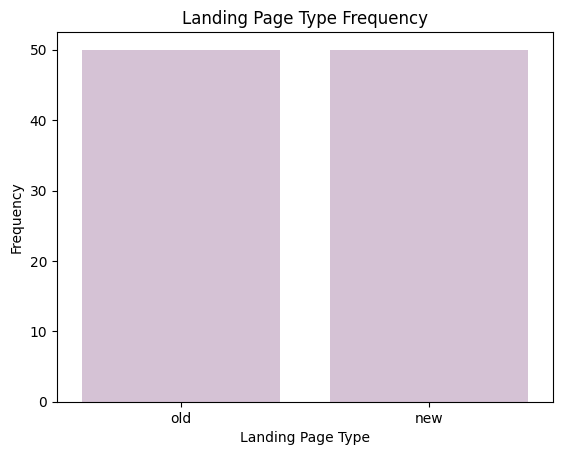



Stats for the Landing Page column
--------------------------------------------------


count     100
unique      2
top       old
freq       50
Name: landing_page, dtype: object

In [347]:
plt.title("Landing Page Type Frequency")
plt.xlabel('Landing Page Type')
plt.ylabel('Frequency')
sns.countplot(data=df, x='landing_page', color='thistle')
plt.show()


print('\n')
print('Stats for the Landing Page column')
print('-'*50)
df['landing_page'].describe()

    Observations:
      *  There are two groups, each with 50 users.
    

#####4) Time Spent

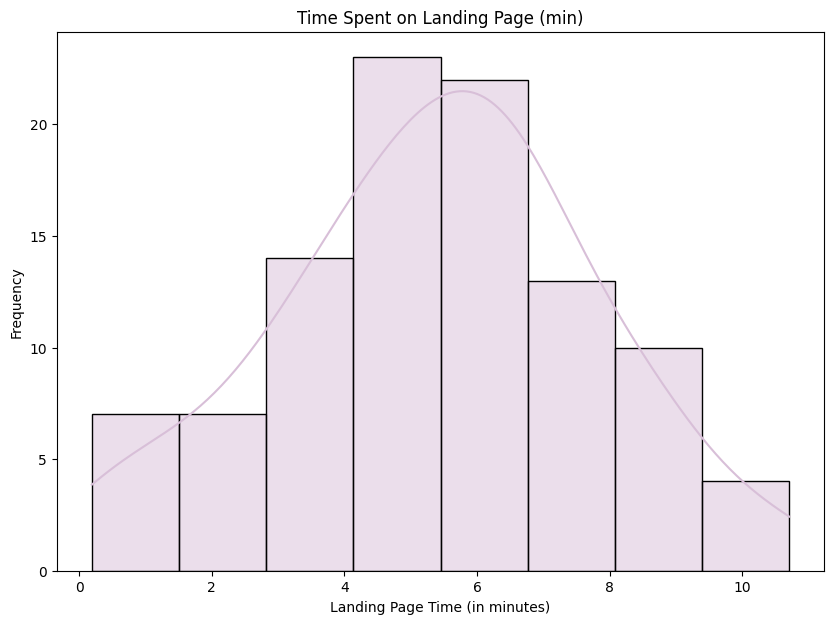

In [348]:
plt.figure(figsize=(9.9,7))
plt.title("Time Spent on Landing Page (min)")
plt.xlabel('Landing Page Time (in minutes)')
plt.ylabel('Frequency')
sns.histplot(data=df, x='time_spent_on_the_page', color='thistle', kde=True)
plt.show()

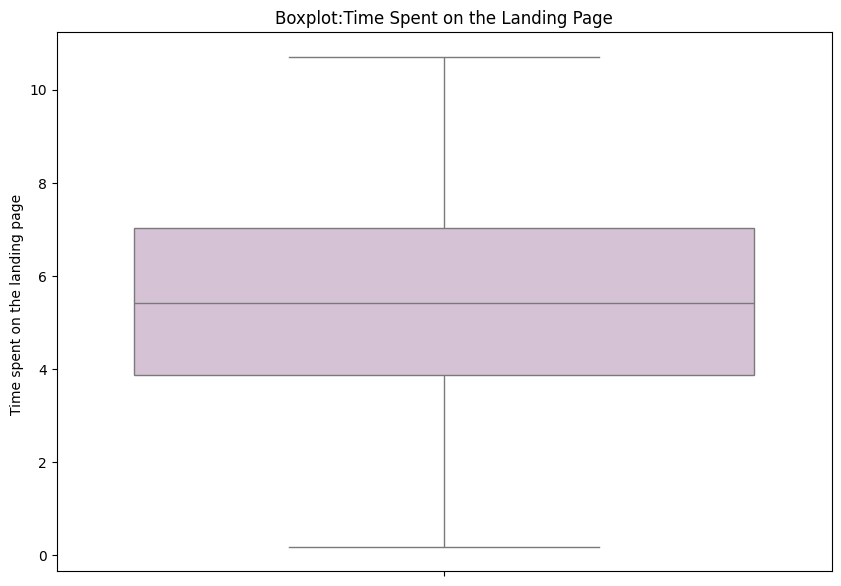

In [349]:
#Also wanted to do a box plot on this:
plt.figure(figsize=(10,7))
plt.title('Boxplot:Time Spent on the Landing Page')
plt.ylabel('Time spent on the landing page ')
sns.boxplot(data = df, y='time_spent_on_the_page', color='thistle')
plt.show()

In [350]:
#Let's print the stats out:
print('Stats for Time Spent on the Page Column')
print('-'*50)
df['time_spent_on_the_page'].describe()

Stats for Time Spent on the Page Column
--------------------------------------------------


count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

    Observations:
      *  We have a normal distribution which goes with what we expected in earlier observations.
      *  All of our graphical displays confirm with eachother in regards to our mean, min and max time spent with the landing pages.

      * Mean time: 5.378 minutes
      * Min Time:  0.19 minutes
      * Max Time: 10.71 minutes

      (Later- in the bivariate analysis-I'll analyze further with filtering by group and conversion to make more observations about specific users.)

#####5) Converted

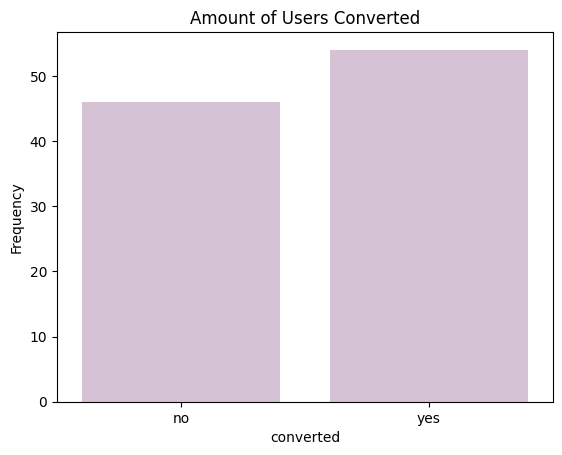



Stats for the Converted column
--------------------------------------------------


count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

In [351]:
#Plot the data in the Group column
plt.title("Amount of Users Converted")
plt.xlabel('converted')
plt.ylabel('Frequency')
sns.countplot(data=df, x='converted', color='thistle')
plt.show()

print('\n')
print('Stats for the Converted column')
print('-'*50)
df['converted'].describe()

    Observations:
      *  Of the 100 users we had 54 users that converted, so more than 50%. As it stands, we don't see an
         argument against the new landing page since we have a metric of over 50% conversion rate, for now.
      *  In the Bivariate analysis we will analyze how many users converted based on their initial grouping and how
         long they spent on the page and see what insights come from there.

#####6) Language Preferred

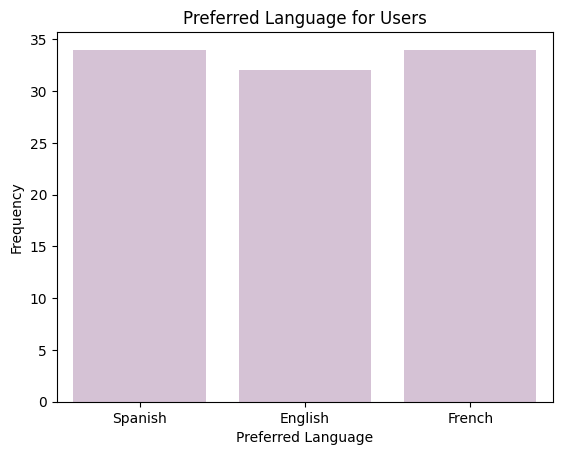



Stats for the Preferred Language column
--------------------------------------------------


count         100
unique          3
top       Spanish
freq           34
Name: language_preferred, dtype: object

In [352]:
#Plot the data in the Preferred Language column
plt.title("Preferred Language for Users")
plt.xlabel('Preferred Language')
plt.ylabel('Frequency')
sns.countplot(data=df, x='language_preferred', color='thistle')
plt.show()

print('\n')
print('Stats for the Preferred Language column')
print('-'*50)
df['language_preferred'].describe()

    Observations:
      *  The top two languages according to the graph are Spanish and French.
      *  All languages are preferred almost equally, so it wouldn't be wise to remove any of the available languages.

      *Spanish- 34%
      *French - 34%
      *English- 32%

### Bivariate Analysis

#### 1) Group Vs Landing Page

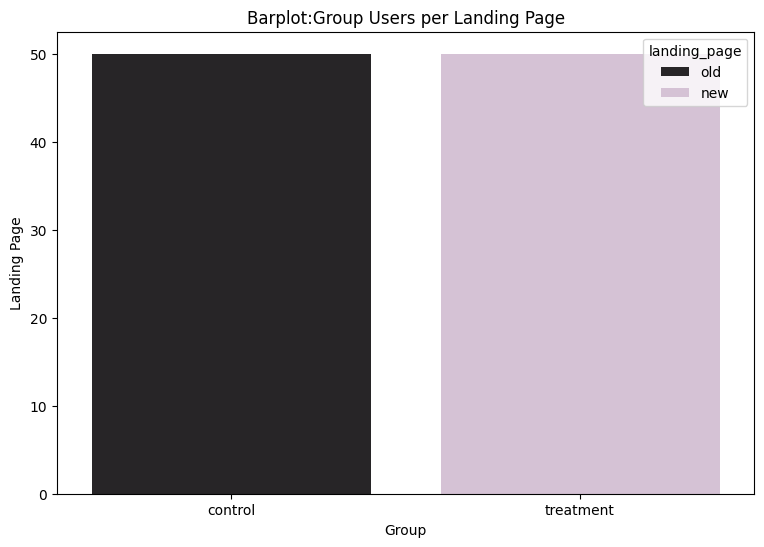

In [353]:
plt.figure(figsize=(9,6))
plt.title('Barplot:Group Users per Landing Page')
plt.ylabel('Landing Page')
plt.xlabel('Group')
sns.countplot(data=df, x='group', hue='landing_page', palette='dark:thistle');
plt.show()

**Observations:**

    *  We can see here that the group was split evenly at the start.
    *  50% of users started at the old page as the control group and the treatment group got the other 50% and the new landing page.

####2) Group vs Time spent on the Page

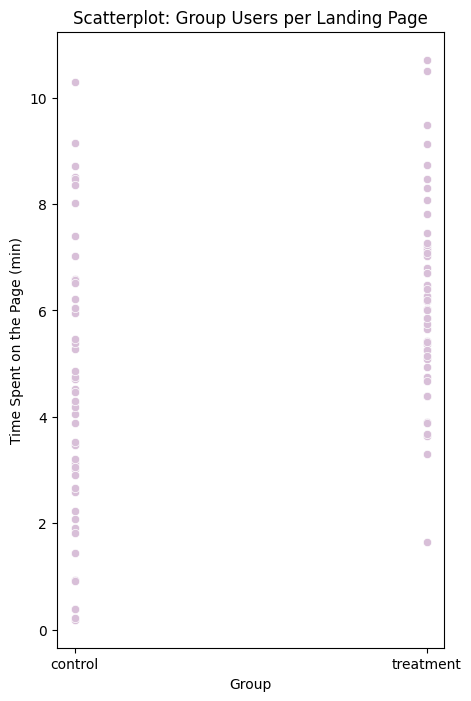

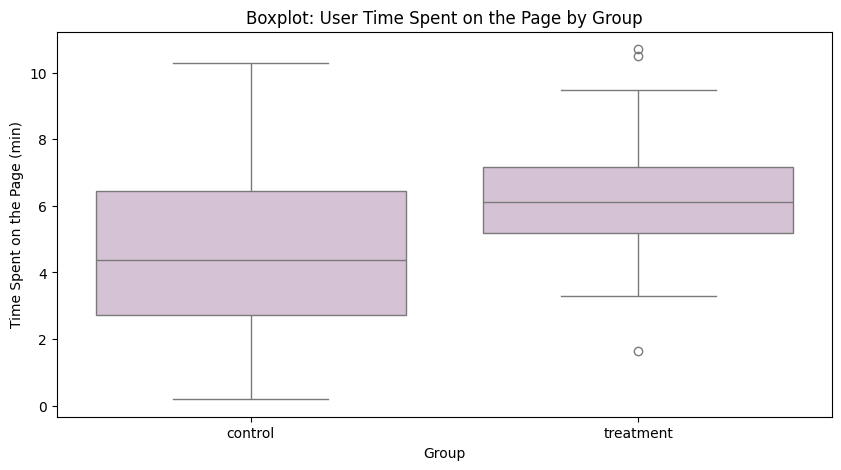

In [354]:
 #scatterplot
plt.figure(figsize=(5,8))
plt.title('Scatterplot: Group Users per Landing Page')
plt.ylabel('Time Spent on the Page (min)')
plt.xlabel('Group')
sns.scatterplot(data=df, x="group", y="time_spent_on_the_page",color='thistle',)
plt.show()
print('\n')
 # do a box plot also
plt.figure(figsize=(10,5))
plt.title('Boxplot: User Time Spent on the Page by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent on the Page (min)')
sns.boxplot(data=df, x="group", y="time_spent_on_the_page",color='thistle',)
plt.show()

**Observations:**

    * This gives some interesting insight. Based on the scatterplot alone we could intuitevely want to promote the new page.
    * The old page with the control group has people who spent less than a minute on the page,
      which springs doubt as to whether these people would subscribe. Most users will explore a
      page to some degree on interest and then subscribe.
    * On the new page we didn't have anyone who was on the page for under a minute.  

#### 3)Time Spent on the Page per Landing Page

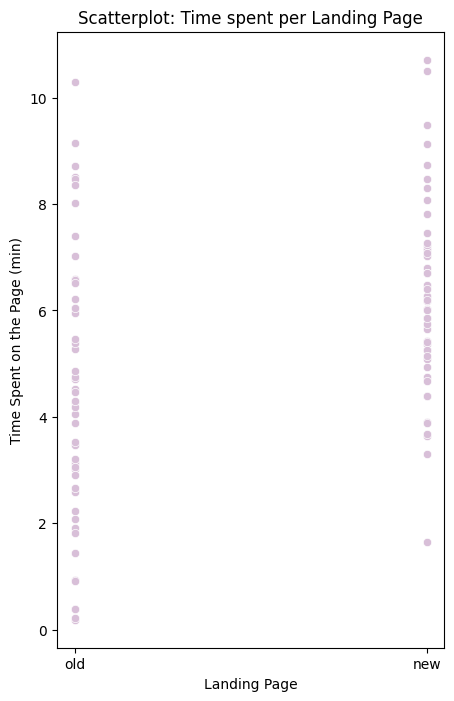

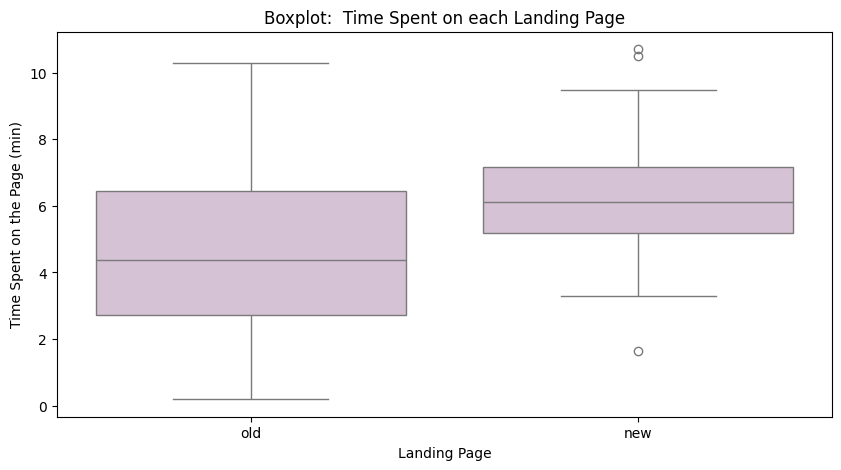

In [355]:
#scatterplot timmmme :D
plt.figure(figsize=(5,8))
plt.title('Scatterplot: Time spent per Landing Page')
plt.ylabel('Time Spent on the Page (min)')
plt.xlabel('Landing Page')
sns.scatterplot(data=df, x="landing_page", y="time_spent_on_the_page",color='thistle',)
plt.show()


print('\n')
# do a box plot also :)
plt.figure(figsize=(10,5))
sns.boxplot(data= df, x ='landing_page', y= 'time_spent_on_the_page', color='thistle', showfliers=True)
plt.title('Boxplot:  Time Spent on each Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page (min)')
plt.show()

**Observations:**

    * Since the landing page is split 50-50 based on the user control group. These graphs will look the same as the previous ones.
    * But I've plotted them just for the sake of being thorough.
    * We just see again that people are staying on the new site for longer.

####4) Conversion Rates by Group

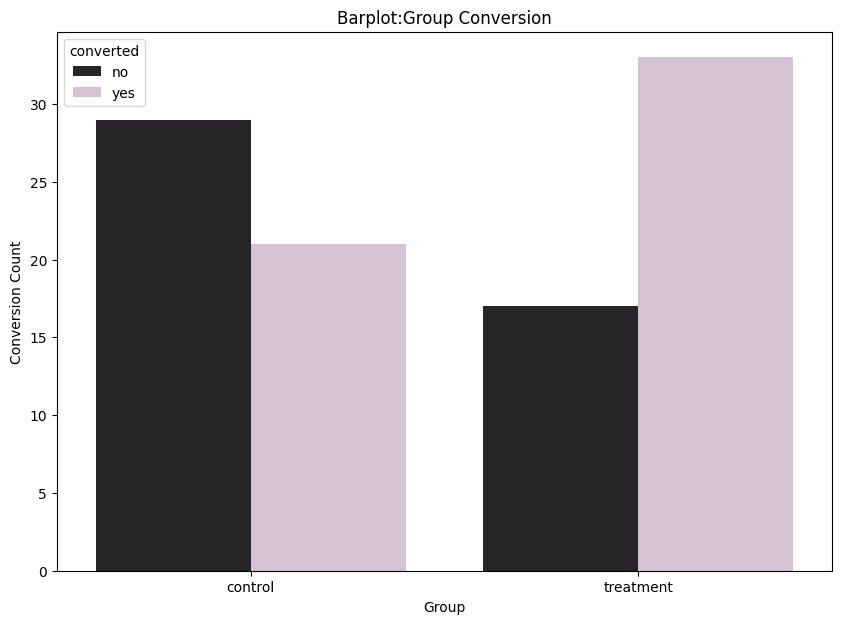

In [356]:
plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Group Conversion')
plt.ylabel('Conversion Count')
plt.xlabel('Group')
sns.countplot(data=df, x='group', hue='converted', palette='dark:thistle');
plt.show()


**Observations:**

    * More evidence we should promote the new landing page.
    * By observing the graph, we know that the new landing page has a higher conversion rate that the existing landing page.
    * The landing page has a ~17 people who didn't subscribe, but over 30 who did.
    * Meanwhile the current landing/ control group has more than
      half the visitors not subscribing, not a good sight.

####5) Conversion & Preferred Language

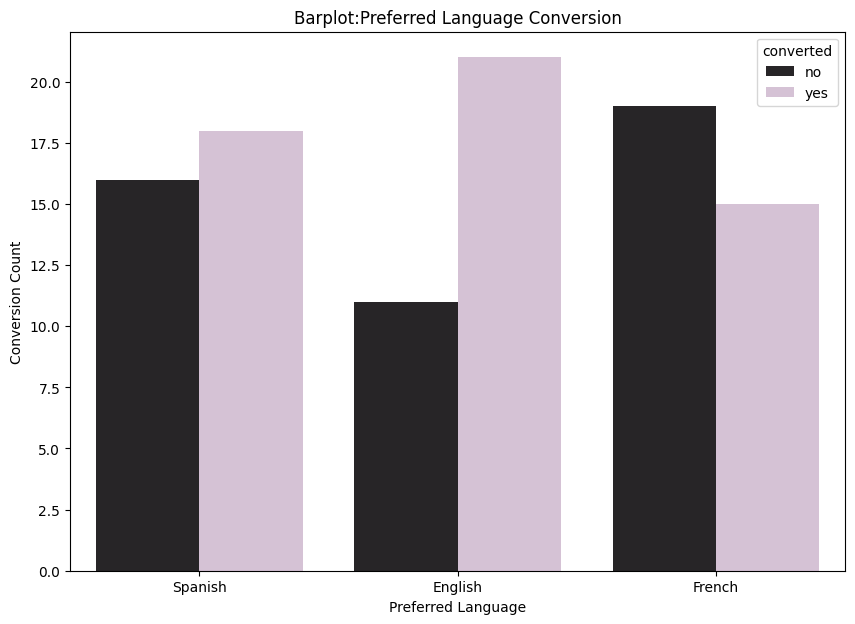

In [357]:
plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Preferred Language Conversion')
plt.ylabel('Conversion Count')
plt.xlabel('Preferred Language')
sns.countplot(data=df, x='language_preferred', hue='converted', palette='dark:thistle');
plt.show()


**Observations:**

    *  So for the Users who chose English and Spanish on the page display we have a higher subscriber count vs a non-subscriber count.
    *  We don't have enough data yet to see why the French display users aren't subscribing. We could theorize a few things:
      a) More French display choosers were part of the control group, which we already know had less subscribers or
      b) Maybe the page was displaying with errors or poor translations. Since we don't have info about this variable in our data set, that might become an *assignment* for someone to look into.

####6) Preferred Language & Group

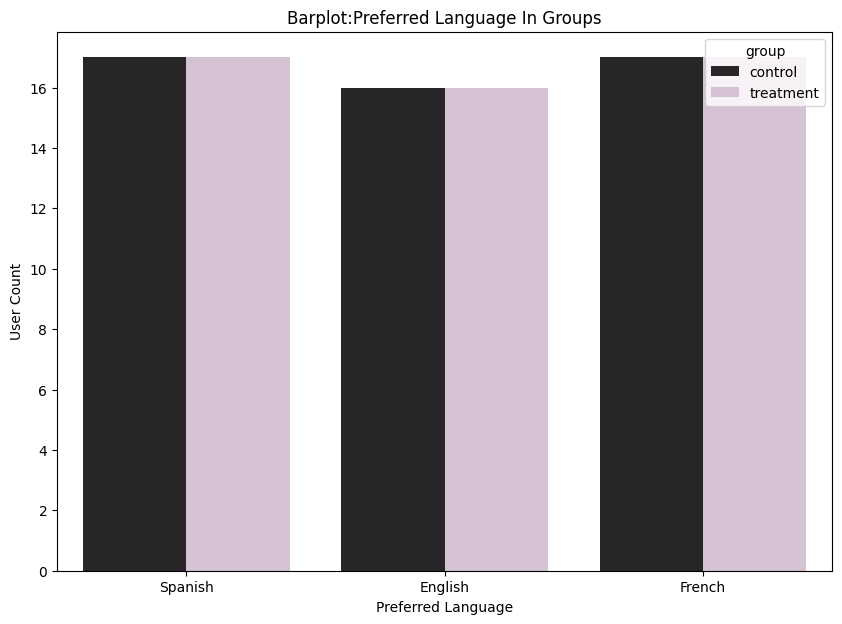

In [358]:
plt.figure(figsize=(10,7)) # makes the plot bigger so that its more readable
plt.title('Barplot:Preferred Language In Groups')
plt.ylabel('User Count')
plt.xlabel('Preferred Language')
sns.countplot(data=df, x='language_preferred', hue='group', palette='dark:thistle');
plt.show()

**Observations:**

    * We can see that all languages were represented equally for both the user and the control group.

####7) Time Spent on the Page & Conversion

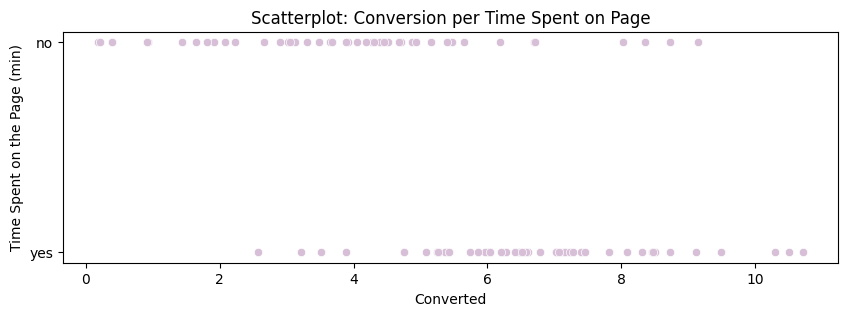

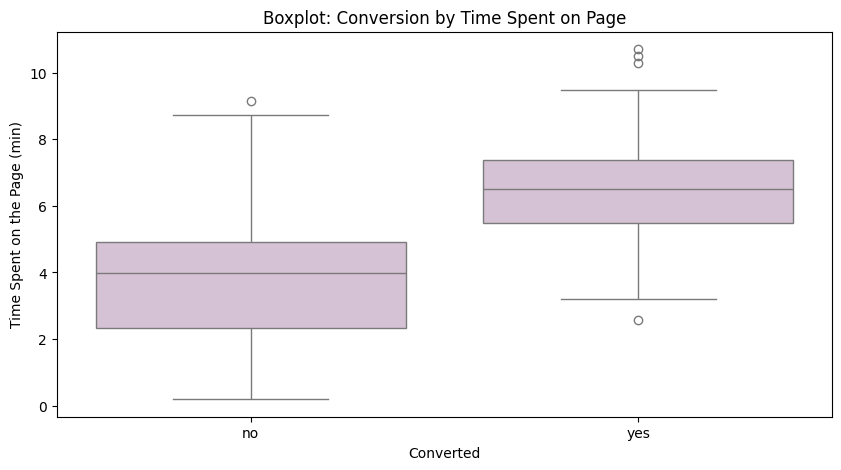

In [359]:
#scatterplot timmmme :D
plt.figure(figsize=(10,3))
plt.title('Scatterplot: Conversion per Time Spent on Page')
plt.ylabel('Time Spent on the Page (min)')
plt.xlabel('Converted')
sns.scatterplot(data=df, x="time_spent_on_the_page", y="converted",color='thistle',)
plt.show()


print('\n')
# do a box plot also :)
plt.figure(figsize=(10,5))
sns.boxplot(data= df, x ='converted', y= 'time_spent_on_the_page', color='thistle', showfliers=True)
plt.title('Boxplot: Conversion by Time Spent on Page')
plt.xlabel('Converted')
plt.ylabel('Time Spent on the Page (min)')
plt.show()

**Observations:**

    *  Both graphs confirm what we had seen previously.
    *  We see a positive correlation with more people subscribing and higher amounts of time spent on the landing page.
    *  We have people on the old landing page who immediately left but we have people who did subscribe who stayed for over then minutes using the page.
    * 75% of people who didn't subscribe didn't spend more then 5 minutes on the langing page.
    * Meanwhile of the people who did subscribe 75% of people spent at least 5 minutes on the page.
    

####**List of Bivariate Analysis Graphs- Not plotted**


These graphs were plotted initially but then removed from my final submission due to redundancy. The details and code are listed for the sake of thoroughness and completion.


*   **Barplot:Landing page versus Languages preferred.**
    
    Excluded since its the same as Group vs Language Preferred.
    

      Code Below:
          plt.figure(figsize=(10,7))
          plt.title('Barplot:Preferred Language Conversion')
          plt.ylabel('Conversion Count')
          plt.xlabel('Preferred Language')
          sns.countplot(data=df, x='language_preferred', hue='landing_page', palette='dark:thistle');
          plt.show()


*   **Barplot:Landing Page Conversion**

    Excluded since its the same as the Group Conversion
  
      
      Code Below:
          plt.figure(figsize=(10,7))  
          plt.title('Barplot:Landing Page Conversion')
          plt.ylabel('Conversion Count')
          plt.xlabel('Landing Page')
          sns.countplot(data=df, x='landing_page', hue='converted', palette='dark:thistle');
          plt.show()

---
##**Statistical Analysis Questions**
---

## **1. Do the users spend more time on the new landing page than the existing landing page?**

#### Step 0: Perform Visual Analysis

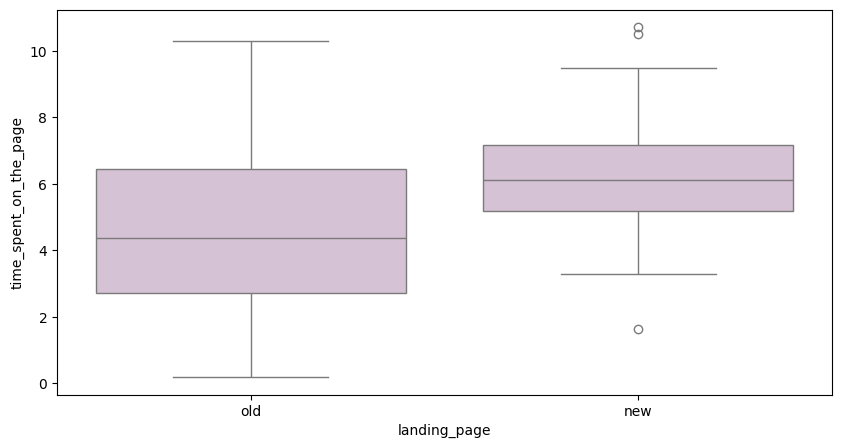

In [360]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x = 'landing_page', y = 'time_spent_on_the_page', color='thistle')
plt.show()

#### Step 1: Define the null and alternate hypotheses

 $H_0$:  μ_New_Page = μ_Existing_Page

 $H_a$:  μ_New_Page > μ_Existing_Page

where:
* μ_New_Page represents the population mean time spent on the new landing page.
* μ_Existing_Page represents the population mean time spent on the new landing page.


#### Step 2: Select Appropriate test



    The appropriate test would be an Independent two-sample T test.


#### Step 3: Decide the significance level


    The problen statement gave us an assigned significance level of alpha = 0.05.

#### Step 4: Collect and prepare data

In [361]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


#### Step 5: Calculate the p-value

In [362]:
# complete the code to import the required function
from scipy.stats import ttest_ind
# write the code to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


#### Step 6: Compare the p-value with $\alpha$


    * The p-value is 0.001392.
    * The significance level is 0.05.
    * Therefore the p-value is less than the significance level (and we can reject the null hypothesis!) The code is below just in case.

In [363]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


#### Step 7:  Draw inference

    
    We can reject the null hypothesis and come to the new conclusion that people spend more time on the new landing page.  

## **2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

#### Step 0: Perform Visual Analysis

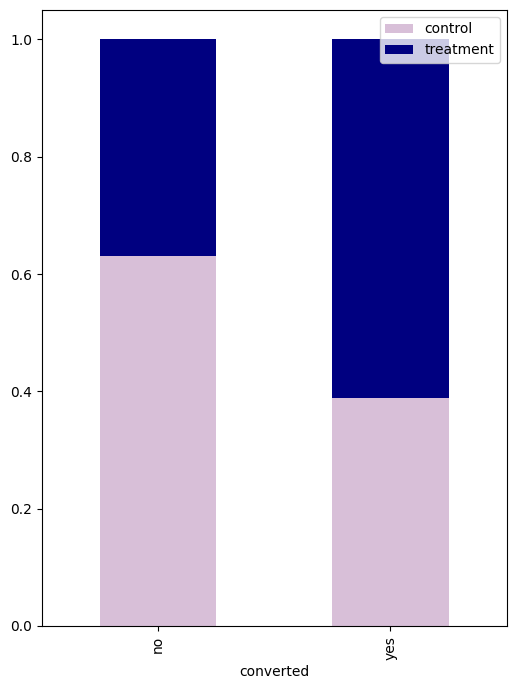

In [364]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['group'],normalize='index').plot(kind="bar", color=['thistle', 'navy'],figsize=(6,8),stacked=True)
plt.legend()
plt.show()

#### Step 1: Define the null and alternate hypotheses

$H_0$:  p_new <= p_old

$H_a$:  p_new > p_old

Where:
*   p_new is the population conversion rate for the new landing page.
*   p_old is the population conversion rate for the old landing page.



#### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations.

    The appropriate test would be a two proportion Z-Test.

#### Step 3: Decide the significance level


    The problen statement gave us an assigned significance level of alpha = 0.05.

#### Step 4: Collect and prepare data

In [365]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


#### Step 5: Calculate the p-value

In [366]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


#### Step 6: Compare the p-value with $\alpha$


    Since the p value is less than the 0.05 level of significance, we will reject the null hypothesis.

In [367]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


#### Step 7:  Draw inference

Since we get to reject the null hypothesis we can say that given the p value of 0.00802, the conversion for the new page is greater than the conversion for the old page.

## **3. Is the conversion and preferred language are independent or related?**

#### Step 0: Perform Visual Analysis

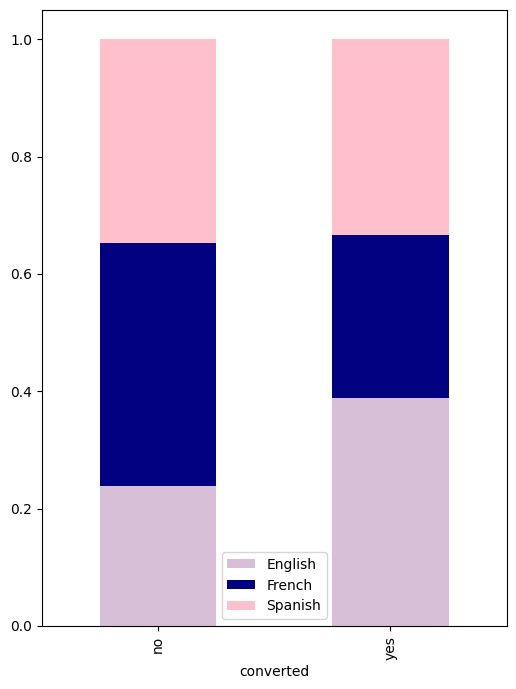

In [368]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar",color=['thistle', 'navy', 'pink'], figsize=(6,8), stacked=True)
plt.legend()
plt.show()

#### Step 1: Define the null and alternate hypotheses

$H_0$:Conversion and preferred language are independent (no association)

$H_a$:Conversion and preferred language are dependent (association exists)


#### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language.

    The appropriate test would be the Chi Square Test.

#### Step 3: Decide the significance level


    The problen statement gave us an assigned significance level of alpha = 0.05.

#### Step 4: Collect and prepare data

In [369]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#### Step 5: Calculate the p-value

In [370]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


#### Step 6: Compare the p-value with $\alpha$

In [371]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 7:  Draw inference

Since we failed to reject the null hypothesis we can safely say that the conversion rate and the preferred language do have some relation in our collected data.

##**4. Is the time spent on the new page same for the different language users?**

#### Step 0: Perform Visual Analysis

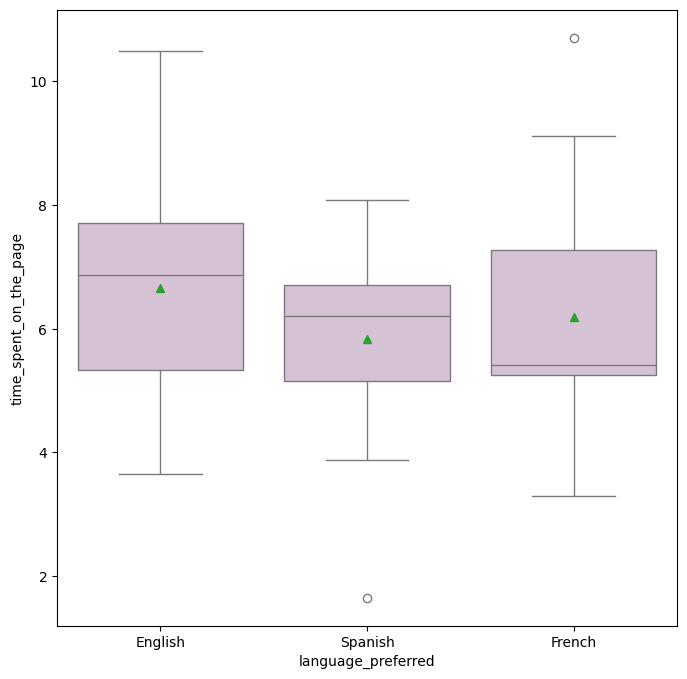

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [372]:
df_new = df[df['landing_page'] == 'new']
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y ='time_spent_on_the_page',color='thistle', showmeans = True, data = df_new)
plt.show()
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

#### Step 1: Define the null and alternate hypotheses

$H_0$:   μ_1=μ_2=μ_3

$H_a$:  at least one language has a mean time spent on the page that differs among users of different languages.

#### Step 2: Select Appropriate test

This is a problem, concerning three population means.

    Therefore the appropriate test is the one-way Anova F-Test.

#### Step 3: Decide the significance level


    The problen statement gave us an assigned significance level of alpha = 0.05.

#### Step 4: Collect and prepare data

In [373]:
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # complete your code here

#### Step 5: Calculate the p-value

In [374]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


#### Step 6: Compare the p-value with $\alpha$

In [375]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


#### Step 7:  Draw inference

The alternate hypothesis was at least one of the population means would be different and just by looking at the means in the graph we can see this is true.

However, after running the one way Anova F-Test, we failed to reject the null hypothesis and must say that the time spend on the page is not the same for different language users.

---
## **Conclusion and Business Recommendations**
---

**Conclusions**

    Answers to the 4 main questions:
    *   The users spend more time on the new landing page then the existing landing page.
    *   The conversion rate for the new page is higher than the conversion rate for the existing landing page.
    *   The conversion rate and the preferred language are related.
    *   The time spent on on the new page is different across languages, but the mean is similar.


    Additional Conclusions:

    *  The average time is around 5.377 minutes per user.
    *  We do have more people converting on the new page already so we should see an increase in subscribers once the new page is implemented.
    


**Business Recommendations**

    *   Definitely implement the new landing page and keep optimizing it in order to receive more subscribers.
    *   We need to look into what's causing a lower conversion rate for the users that selected French as the display language.
    *   We could even look at other languages to add if we could also gain subscribers that way.
    *   We could do research into what news articles attract the most traffic and keep updating our news outline to adjust for what the audience clicks on. (A live dashboard could be useful for this)
    *   We could run sentient analysis to see what kind of news creates emotional responses on the page.
    *   We could make it a metric to aim to keep people on the page for at least 2 minutes and see if we have continuous new subscribers if the page has content that could could a user engaged long enough.
  


___